In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.columns = ['Passengers']

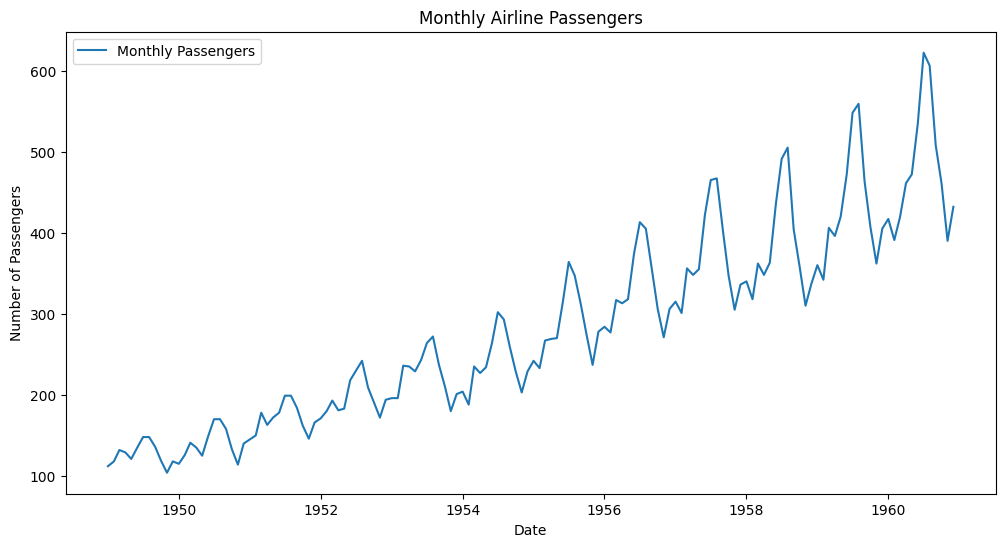

In [4]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data, label='Monthly Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [5]:
# Decompose the time series
decomposition = seasonal_decompose(data, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

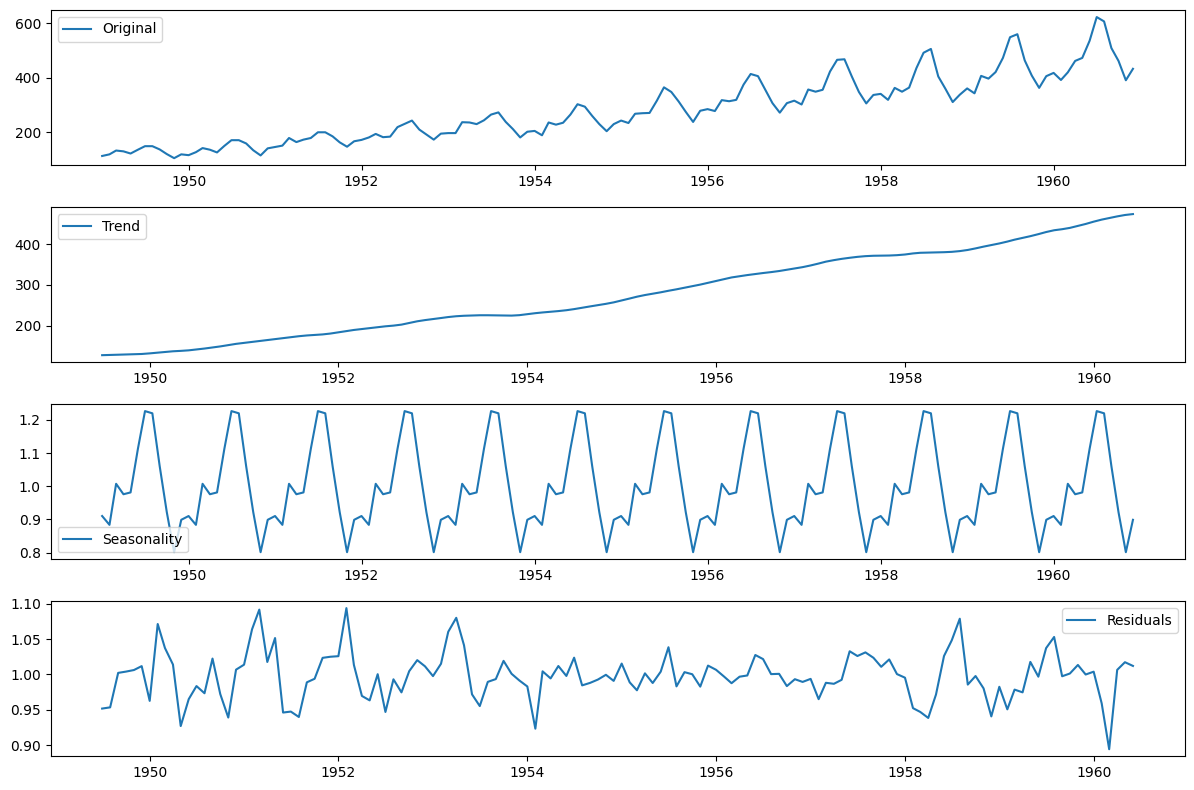

In [6]:
# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [7]:
# Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [8]:
# Perform ADF test
print('ADF Test on Original Series:')
adf_test(data['Passengers'])

ADF Test on Original Series:
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [9]:
# Differencing
data_diff = data.diff().dropna()
print('ADF Test on Differenced Series:')
adf_test(data_diff['Passengers'])

ADF Test on Differenced Series:
ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


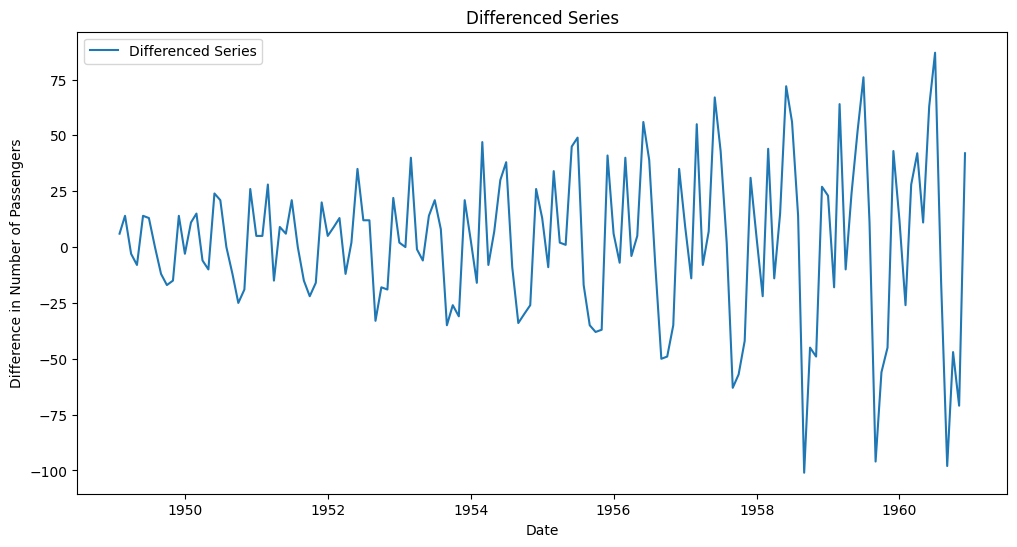

In [10]:
# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='Differenced Series')
plt.title('Differenced Series')
plt.xlabel('Date')
plt.ylabel('Difference in Number of Passengers')
plt.legend()
plt.show()

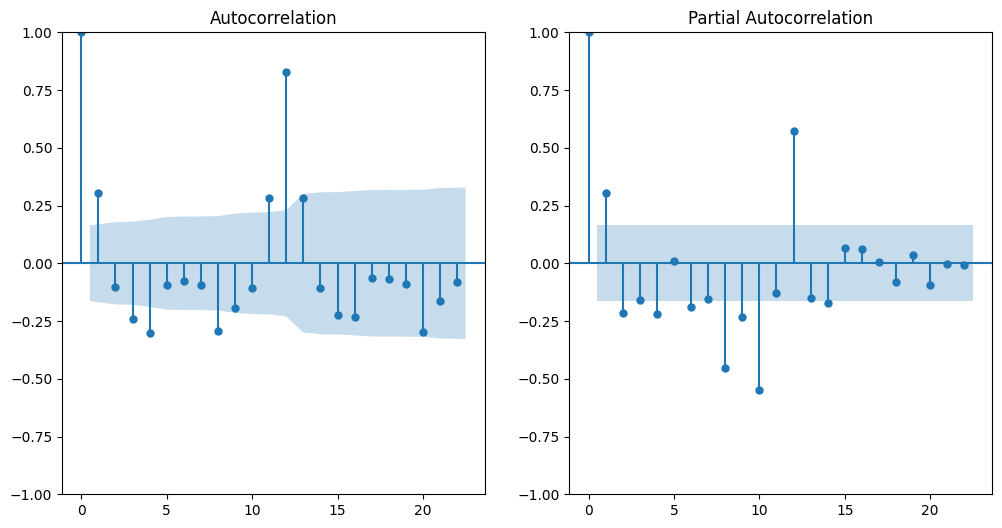

In [11]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff, ax=plt.gca())
plt.subplot(122)
plot_pacf(data_diff, ax=plt.gca())
plt.show()

In [12]:
# Build the ARIMA model
model = ARIMA(data, order=(4, 1, 4))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -662.195
Date:                Thu, 24 Oct 2024   AIC                           1342.390
Time:                        13:39:53   BIC                           1369.056
Sample:                    01-01-1949   HQIC                          1353.226
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0346      0.063     -0.551      0.582      -0.158       0.088
ar.L2          1.0224      0.057     18.074      0.000       0.912       1.133
ar.L3         -0.0675      0.045     -1.513      0.1

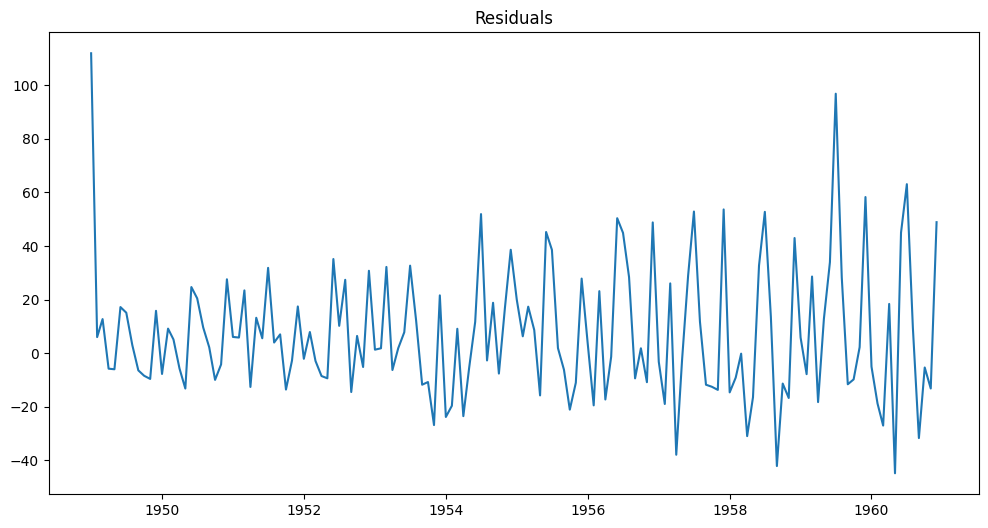

In [13]:
# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

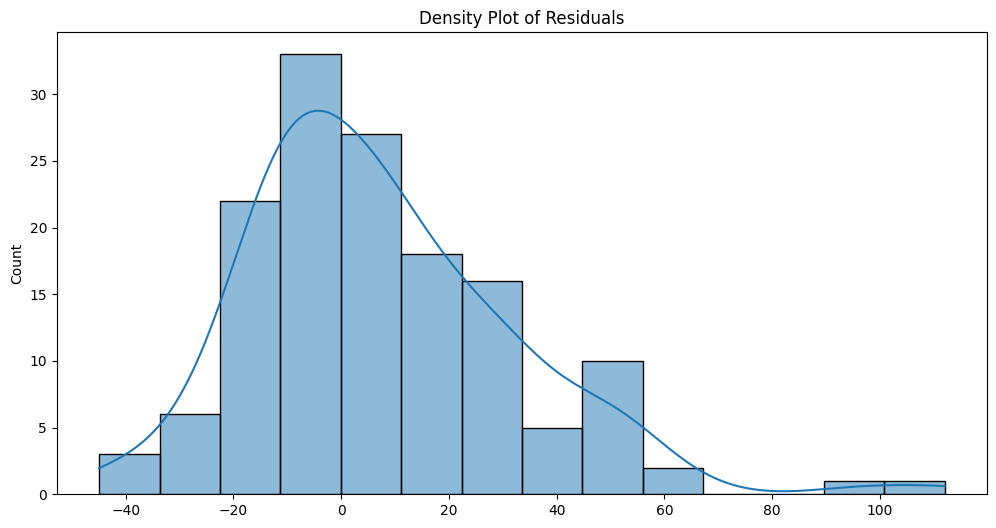

In [14]:
# Plot the density of the residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Density Plot of Residuals')
plt.show()

In [15]:
# Forecasting
forecast_steps = 48
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps, freq='MS')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

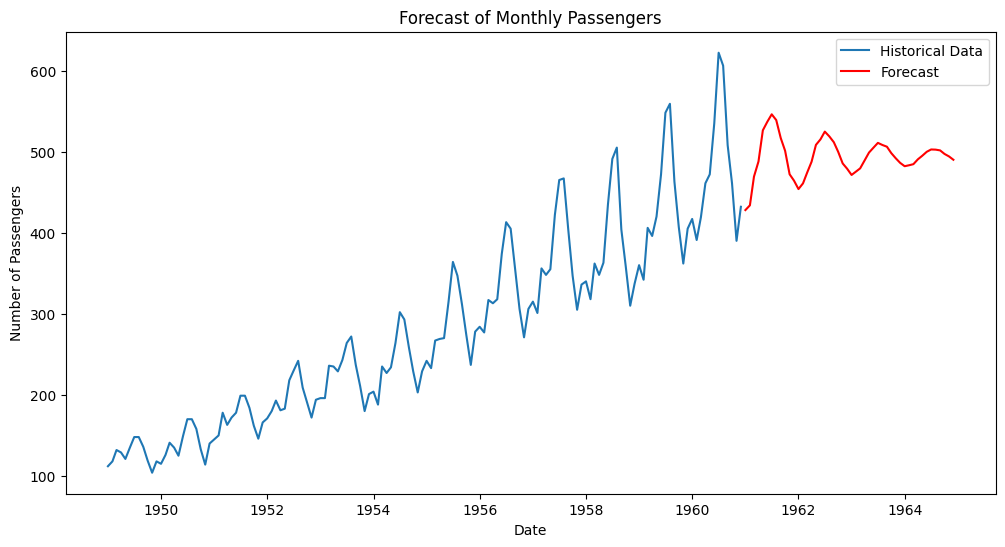

In [16]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Forecast of Monthly Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()